In [ ]:
package('digest')

# Fitting distribution with R

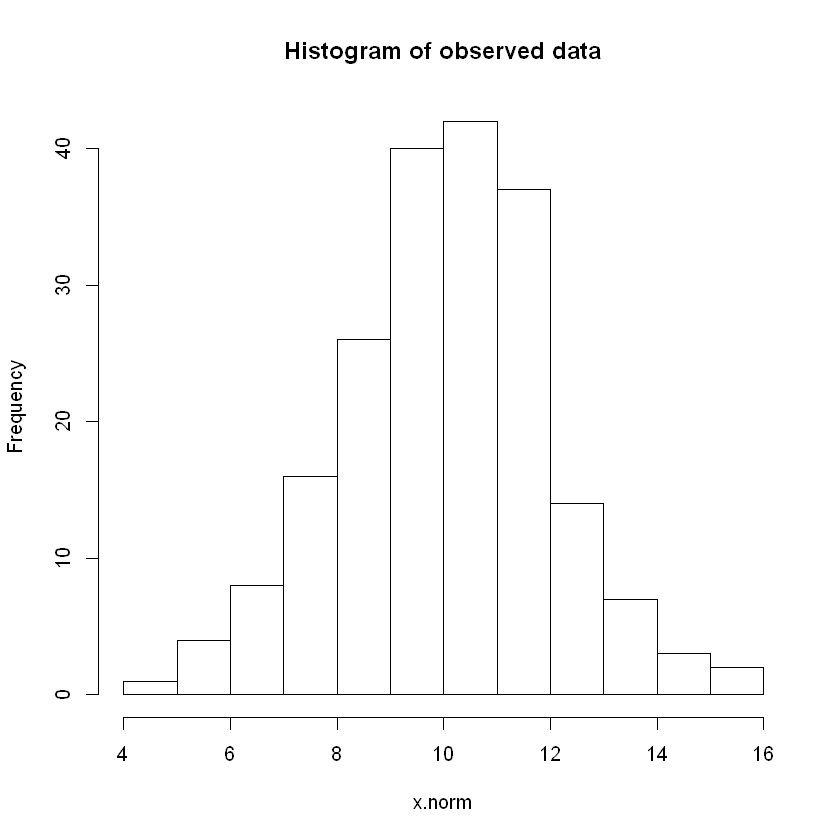

In [15]:
x.norm <- rnorm(n=200,m=10,sd=2)
hist(x.norm,main="Histogram of observed data")

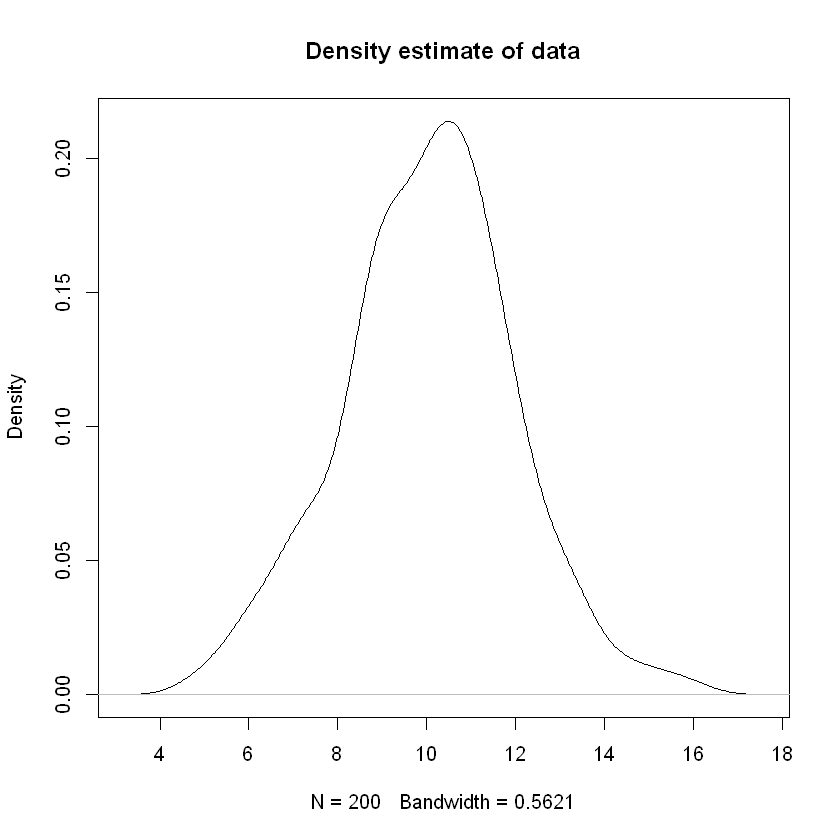

In [16]:
plot(density(x.norm),main="Density estimate of data")

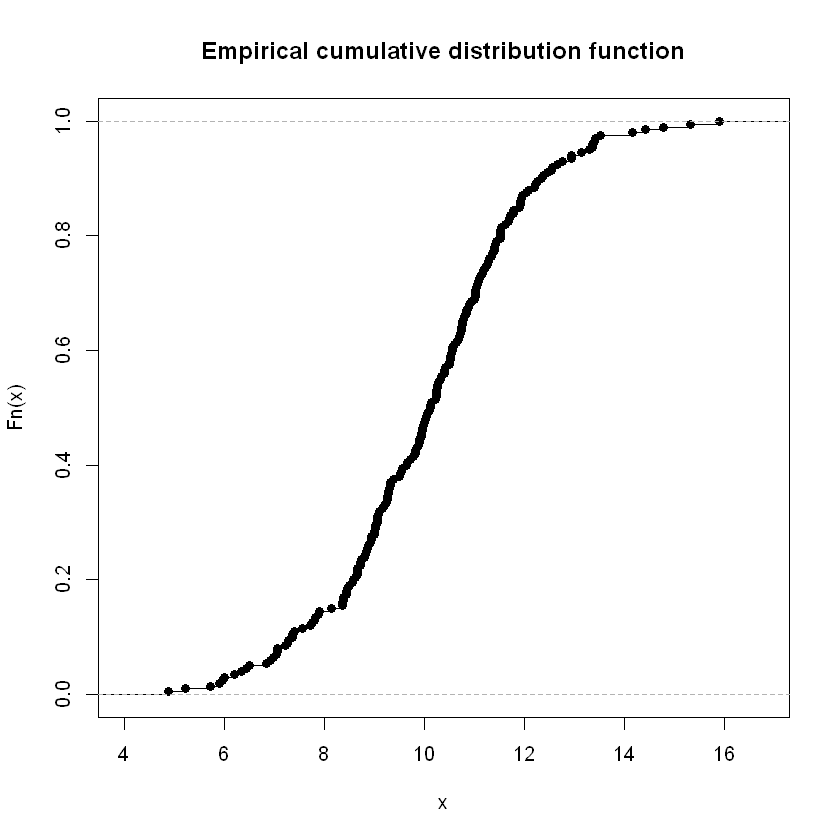

In [17]:
plot(ecdf(x.norm),main="Empirical cumulative distribution function")

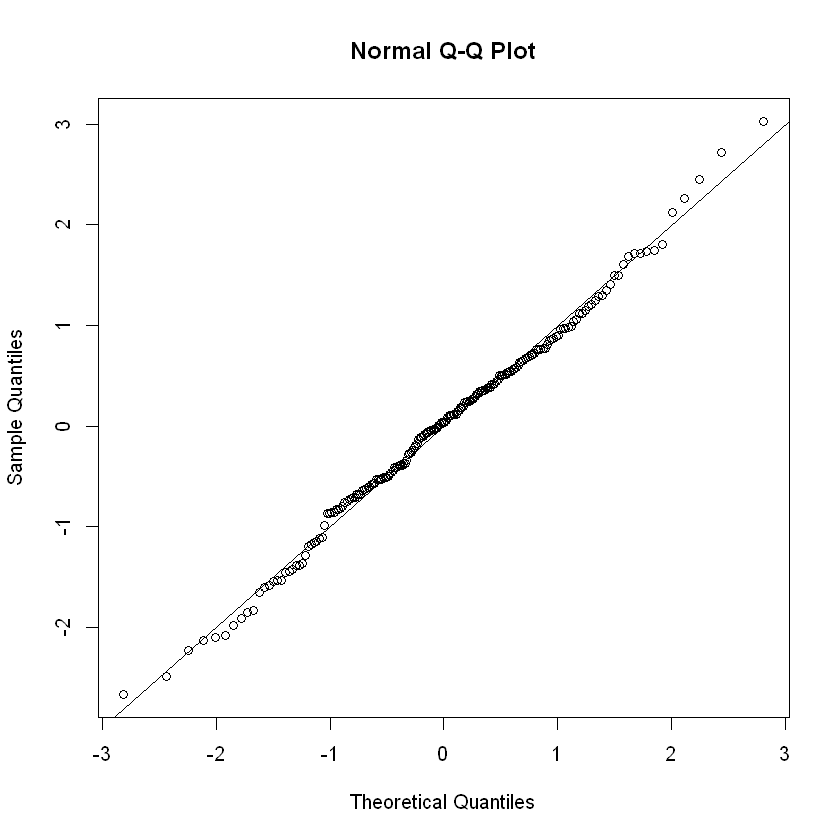

In [18]:
z.norm <- (x.norm-mean(x.norm))/sd(x.norm) # standardize data
qqnorm(z.norm) ## drawing the QQplot
abline(0,1) ## drawing a 45-degree reference line

If data differ from a normal distribution (i.e. data belonging from a Weibull pdf) we cna use `qqplot()` in this way:

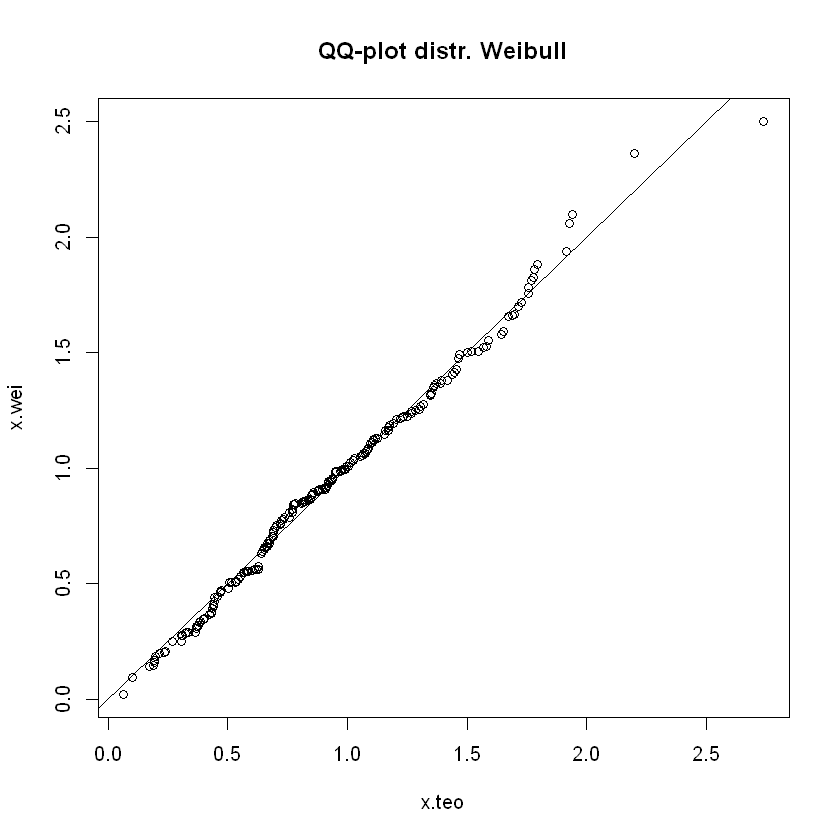

In [23]:
x.wei <- rweibull(n=200,shape=2.1,scale=1.1) ## sampling from a Weibull
x.teo <- rweibull(n=200,shape=2,scale=1) ## theoretical quantiles from a Weibull population
qqplot(x.teo,x.wei,main="QQ-plot distr. Weibull")
abline(0,1)

# Model choice

Dealing with discrete data we can refer to Poisson's distribution with probability mass function:

$$ f(x,\lambda)=e^{-\lambda\dfrac{\lambda^x}{x!}} \quad \text{where } x=0,1,2,\ldots$$ 

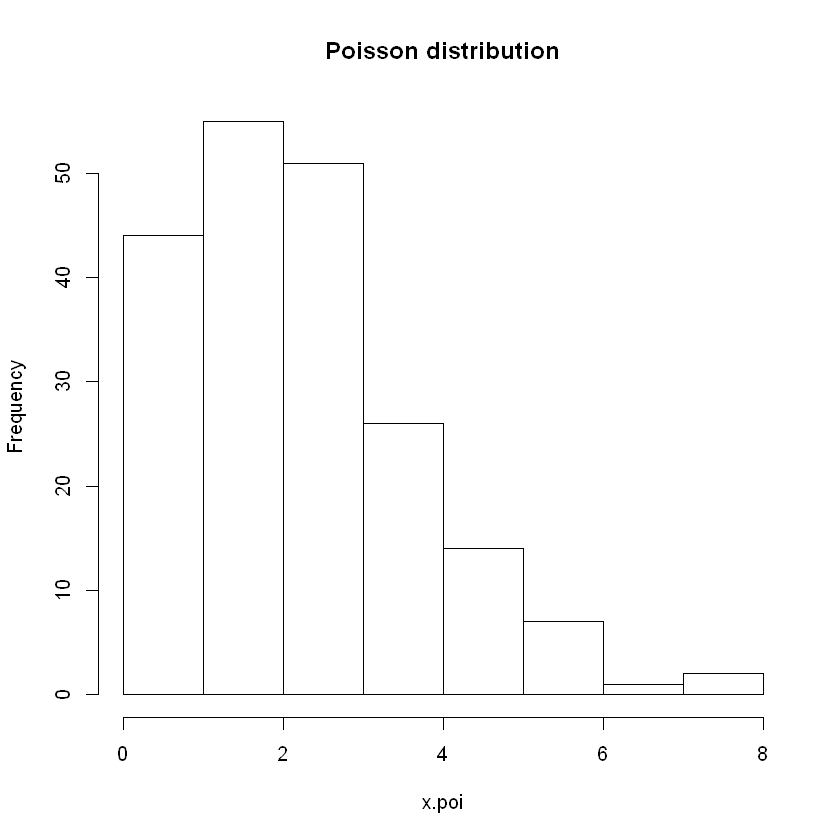

In [24]:
x.poi <- rpois(n=200, lambda=2.5)
hist(x.poi, main="Poisson distribution")

As concern continuous data we have the normal (gaussian) dsitrubition:

$$ f(x,\lambda,\sigma)=\dfrac{1}{\sqrt{2\pi}\sigma} e^{\dfrac{1(x-\mu)^2}{2\sigma^2}} $$

with $x \in \mathbb{R}$.

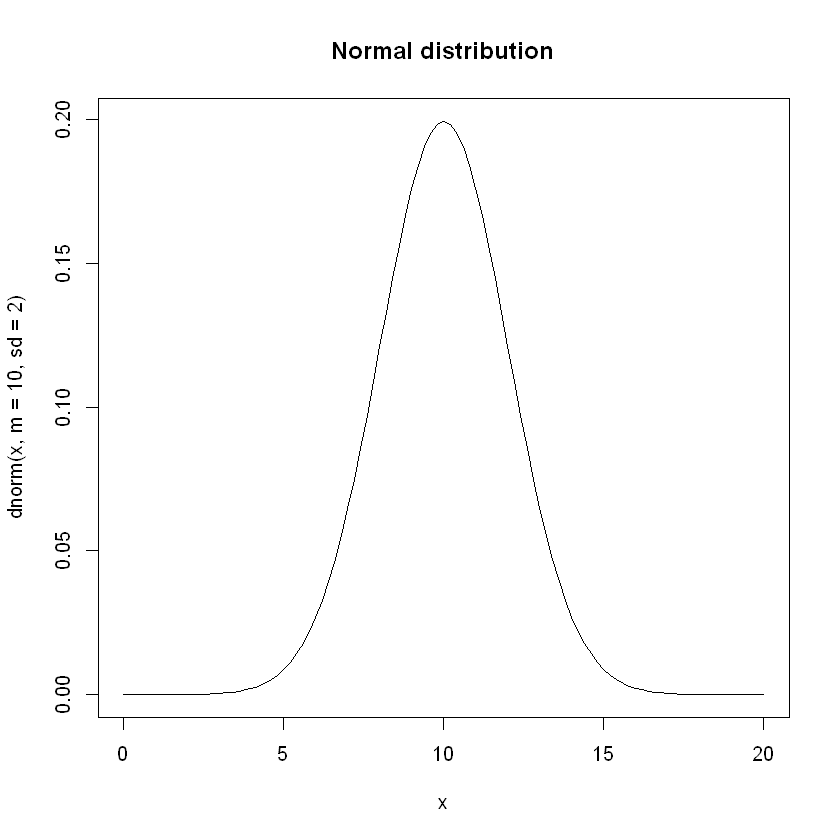

In [25]:
curve(dnorm(x,m=10,sd=2),from=0,to=20,main="Normal distribution")

Gamma distribution:

$$ f(x,\alpha,\lambda)=\dfrac{\lambda^\alpha}{\gamma(\alpha)}x^{\alpha-1}e^{-\lambda x} $$

with $x \in \mathbb{R}^+$.

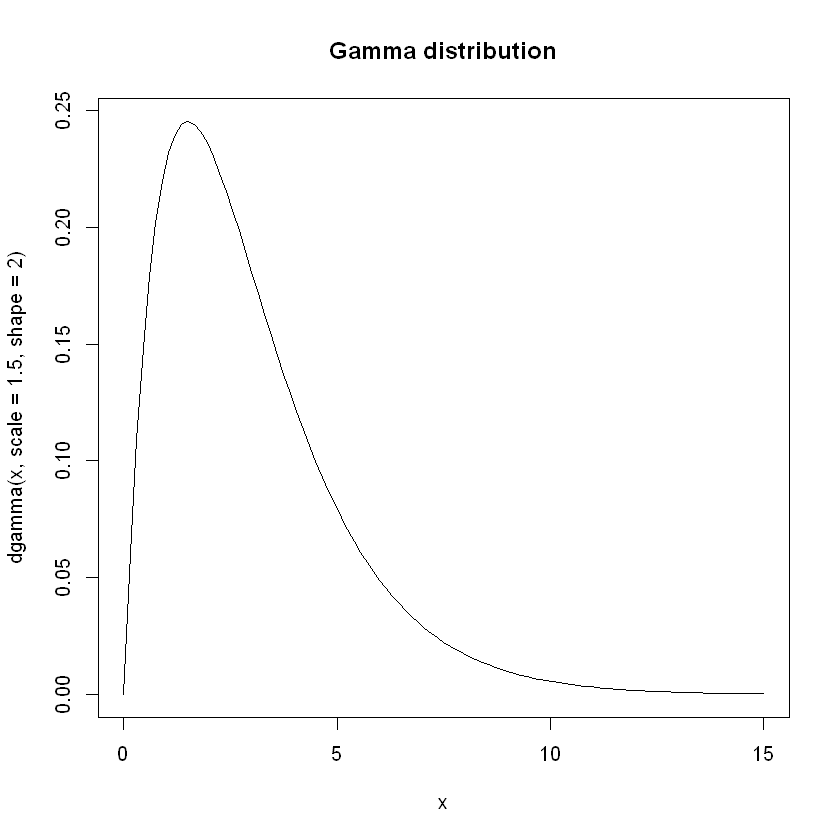

In [26]:
curve(dgamma(x, scale=1.5, shape=2), from=0, to=15, main="Gamma distribution")

Weibull distribition:

$$ f(x,\alpha,\beta)=\alpha\beta^{-\alpha}x^{\alpha-1}e^{-\left[\left(\dfrac{x}{\beta}\right)^\alpha\right]} $$

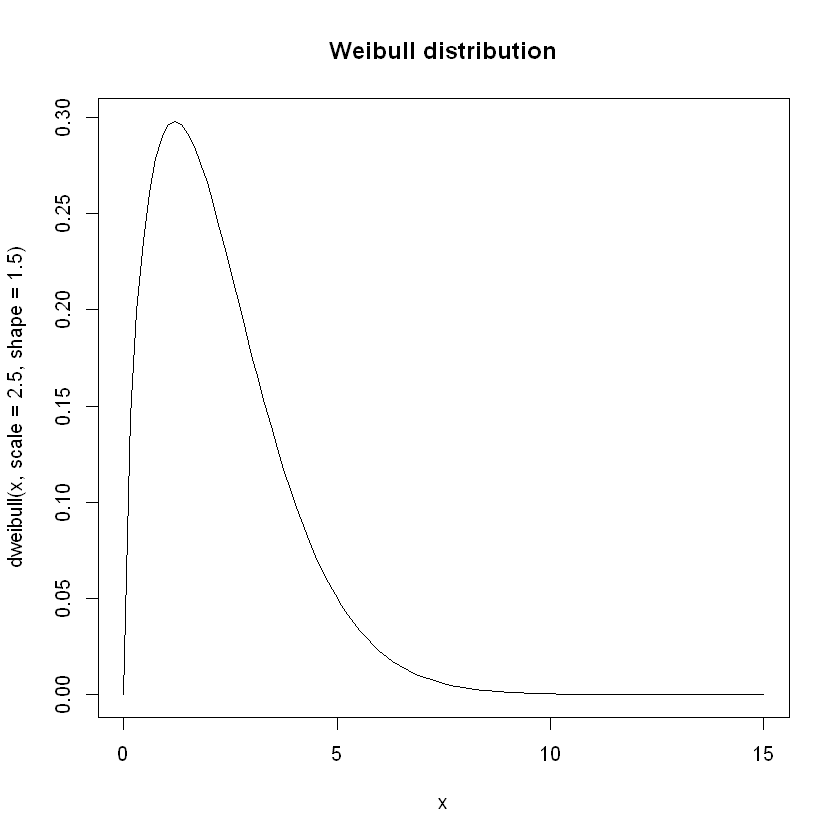

In [27]:
curve(dweibull(x, scale=2.5, shape=1.5), from=0, to=15, main="Weibull distribution")

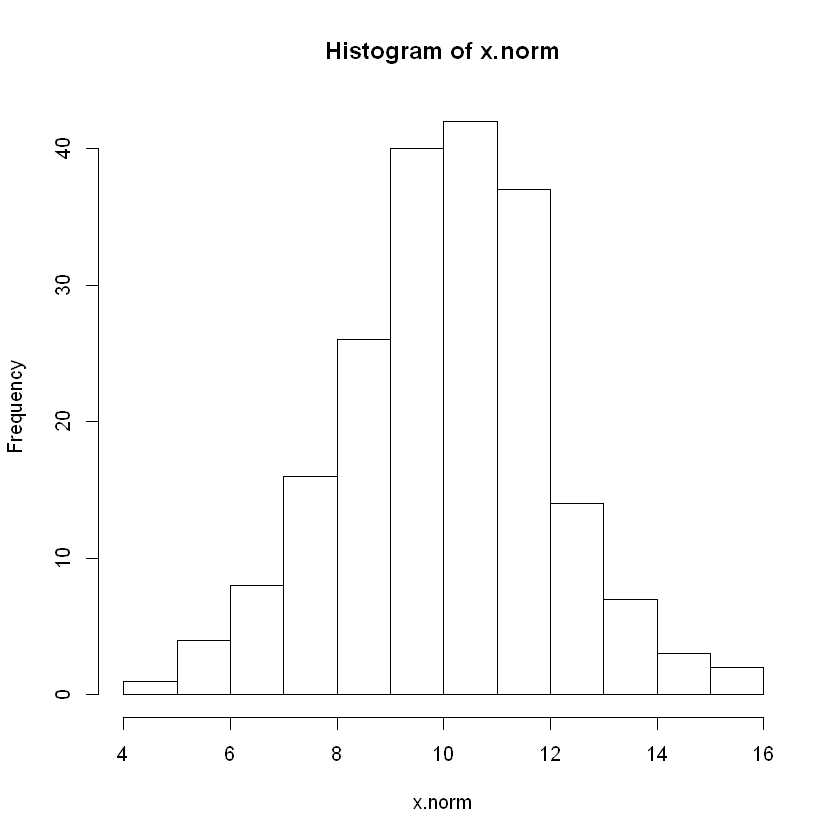

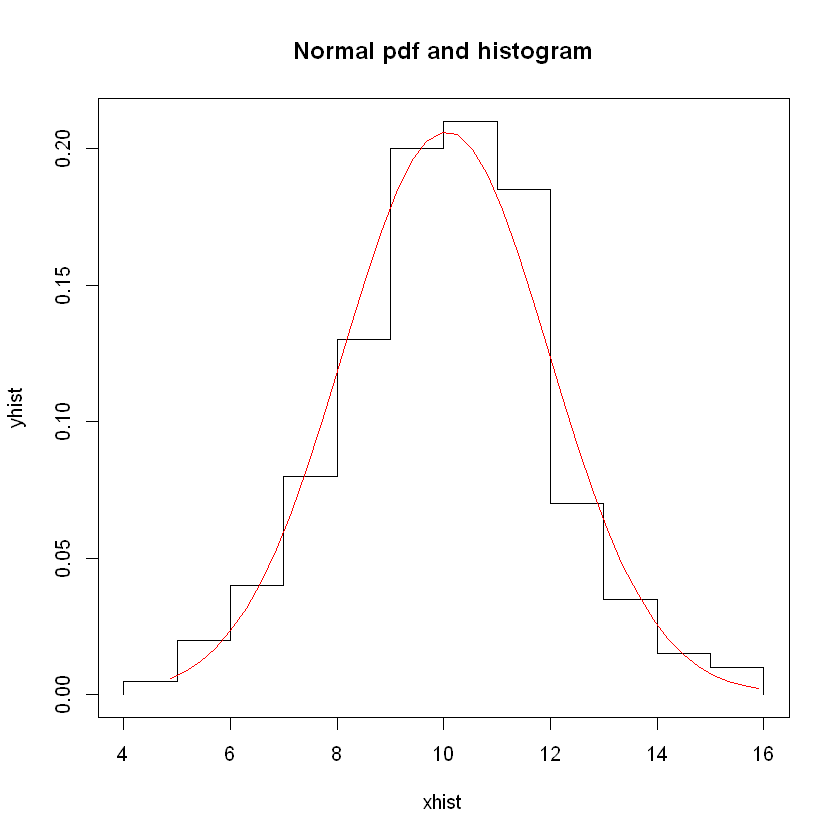

In [29]:
h<-hist(x.norm,breaks=15)
xhist<-c(min(h$breaks),h$breaks)
yhist<-c(0,h$density,0)
xfit<-seq(min(x.norm),max(x.norm),length=40)
yfit<-dnorm(xfit,mean=mean(x.norm),sd=sd(x.norm))
plot(xhist,yhist,type="s",ylim=c(0,max(yhist,yfit)), main="Normal pdf and histogram")
lines(xfit,yfit, col="red")

In [30]:
yfit

[1] 0.005835996 0.008529913 0.012203918 0.017091457 0.023430633 0.031442283
 [7] 0.041301826 0.053106729 0.066842851 0.082354152 0.099321017 0.117252453
[13] 0.135496425 0.153270599 0.169712955 0.183948502 0.195165315 0.202690847
[19] 0.206058607 0.205056010 0.199746587 0.190463320 0.177774086 0.162424179
[25] 0.145264009 0.127171705 0.108980320 0.091417805 0.075065195 0.060335312
[31] 0.047471137 0.036560559 0.027562660 0.020340169 0.014693089 0.010389551
[37] 0.007191270 0.004872361 0.003231458 0.002097890

In [31]:
yhist

[1] 0.000 0.005 0.020 0.040 0.080 0.130 0.200 0.210 0.185 0.070 0.035 0.015
[13] 0.010 0.000

In [32]:
ks.test(yfit,yhist)

Warning message in ks.test(yfit, yhist):
"cannot compute exact p-value with ties"


	Two-sample Kolmogorov-Smirnov test

data:  yfit and yhist
D = 0.19643, p-value = 0.8185
alternative hypothesis: two-sided


# StackOverflow example

The following is from this StackOverflow example: https://stats.stackexchange.com/questions/132652/how-to-determine-which-distribution-fits-my-data-best

This requires you to install the following packages with the R package manager: `fitdistrplus` and `logspline`.

In [35]:
library(fitdistrplus)
library(logspline)

x <- c(37.50,46.79,48.30,46.04,43.40,39.25,38.49,49.51,40.38,36.98,40.00,
38.49,37.74,47.92,44.53,44.91,44.91,40.00,41.51,47.92,36.98,43.40,
42.26,41.89,38.87,43.02,39.25,40.38,42.64,36.98,44.15,44.91,43.40,
49.81,38.87,40.00,52.45,53.13,47.92,52.45,44.91,29.54,27.13,35.60,
45.34,43.37,54.15,42.77,42.88,44.26,27.14,39.31,24.80,16.62,30.30,
36.39,28.60,28.53,35.84,31.10,34.55,52.65,48.81,43.42,52.49,38.00,
38.65,34.54,37.70,38.11,43.05,29.95,32.48,24.63,35.33,41.34)

summary statistics
------
min:  16.62   max:  54.15 
median:  40.38 
mean:  40.28434 
estimated sd:  7.420034 
estimated skewness:  -0.551717 
estimated kurtosis:  3.565162 

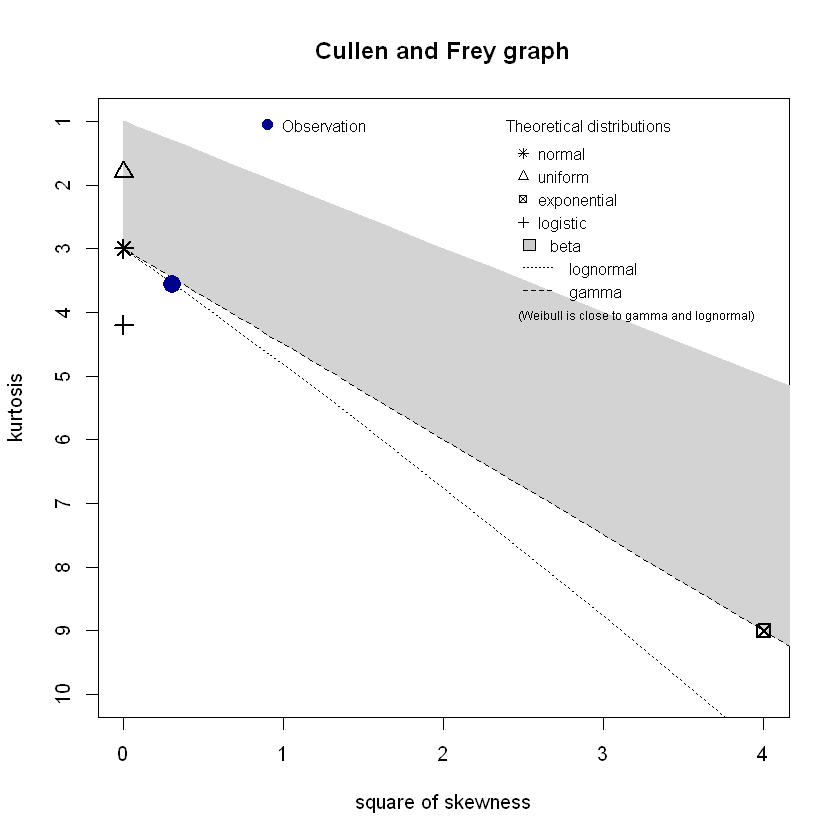

In [36]:
descdist(x, discrete = FALSE)

In [37]:
fit.weibull <- fitdist(x, "weibull")
fit.norm <- fitdist(x, "norm")

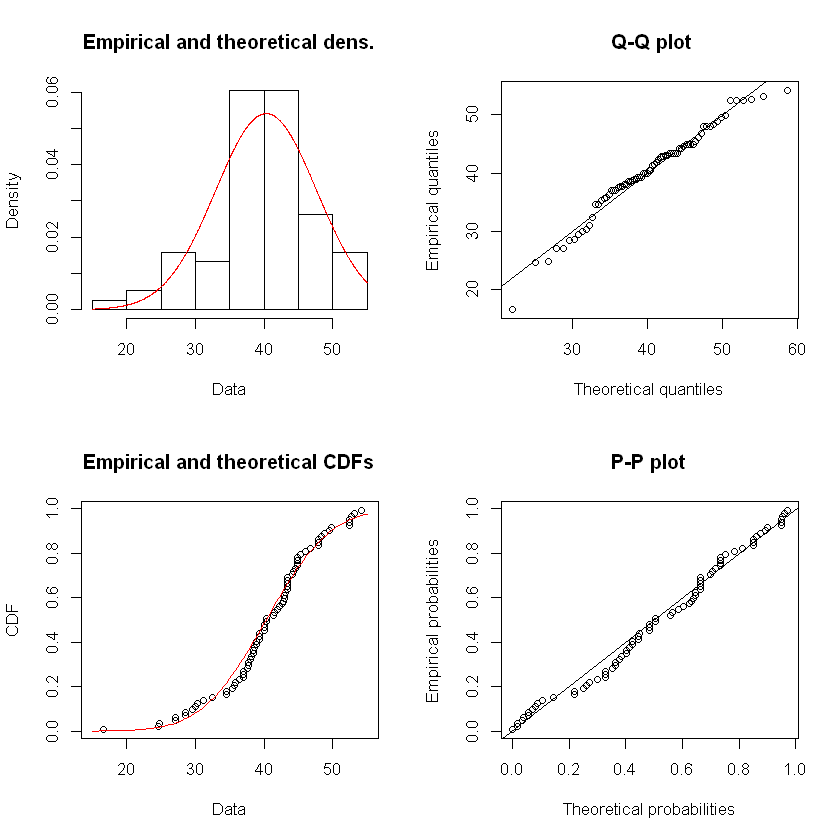

In [38]:
plot(fit.norm)

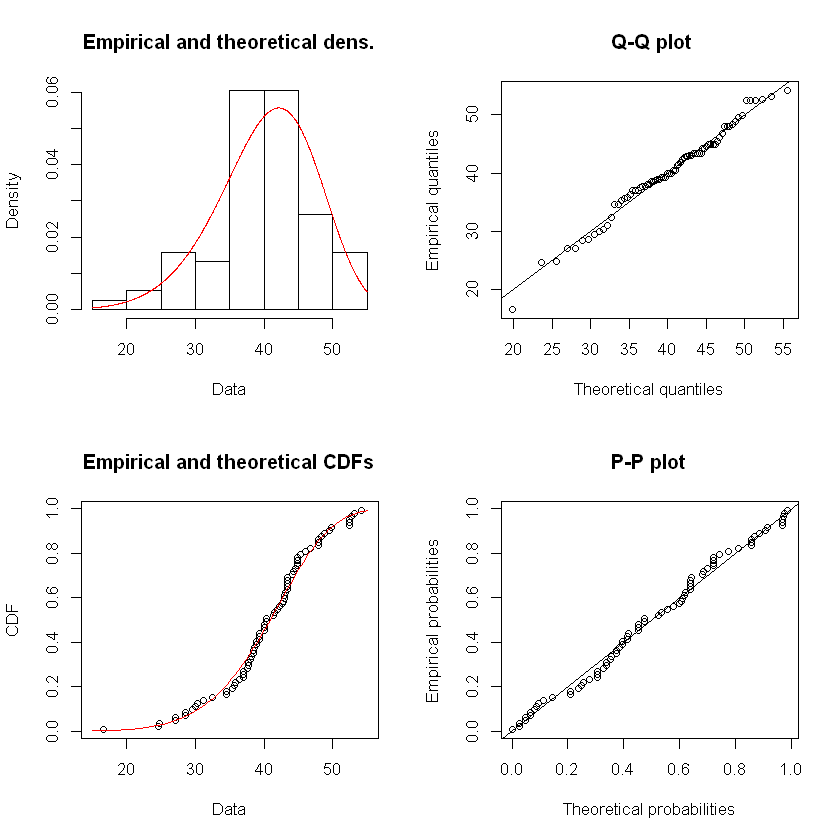

In [39]:
plot(fit.weibull)

In [40]:
fit.weibull$aic

[1] 519.8537

In [41]:
fit.norm$aic

[1] 523.3079

## Kolmogorov-Smirnov test simulation

In [42]:
n.sims <- 5e4

stats <- replicate(n.sims, {      
  r <- rweibull(n = length(x)
                , shape= fit.weibull$estimate["shape"]
                , scale = fit.weibull$estimate["scale"]
  )
  as.numeric(ks.test(r
                     , "pweibull"
                     , shape= fit.weibull$estimate["shape"]
                     , scale = fit.weibull$estimate["scale"])$statistic
  )      
})

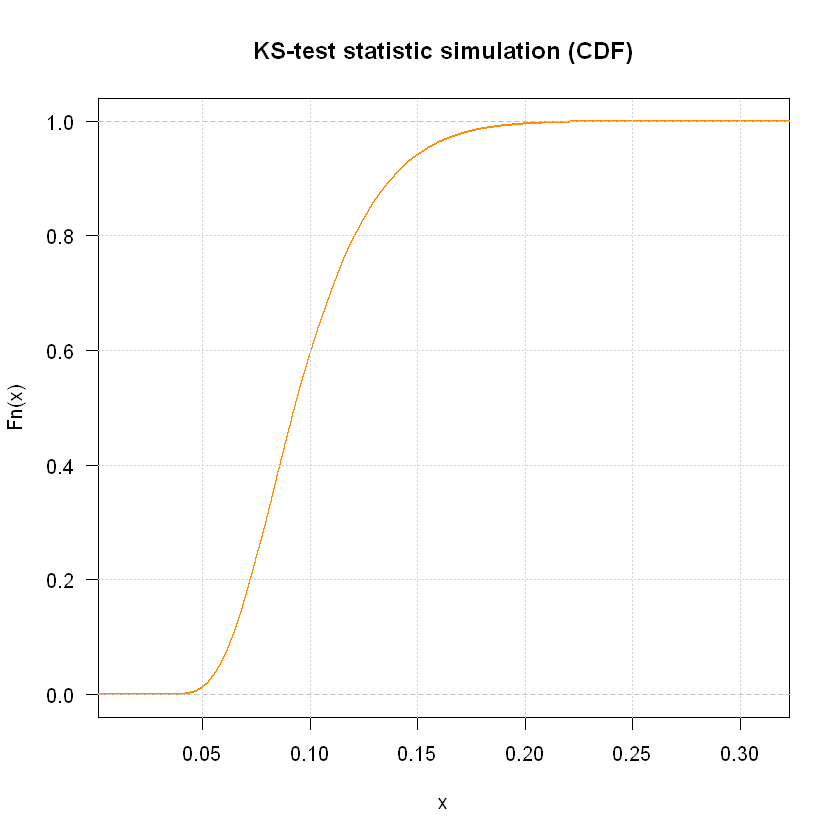

In [43]:
plot(ecdf(stats), las = 1, main = "KS-test statistic simulation (CDF)", col = "darkorange", lwd = 1.7)
grid()

In [44]:
fit <- logspline(stats)

1 - plogspline(ks.test(x
                       , "pweibull"
                       , shape= fit.weibull$estimate["shape"]
                       , scale = fit.weibull$estimate["scale"])$statistic
               , fit
)

Warning message in ks.test(x, "pweibull", shape = fit.weibull$estimate["shape"], :
"ties should not be present for the Kolmogorov-Smirnov test"

[1] 0.8440719

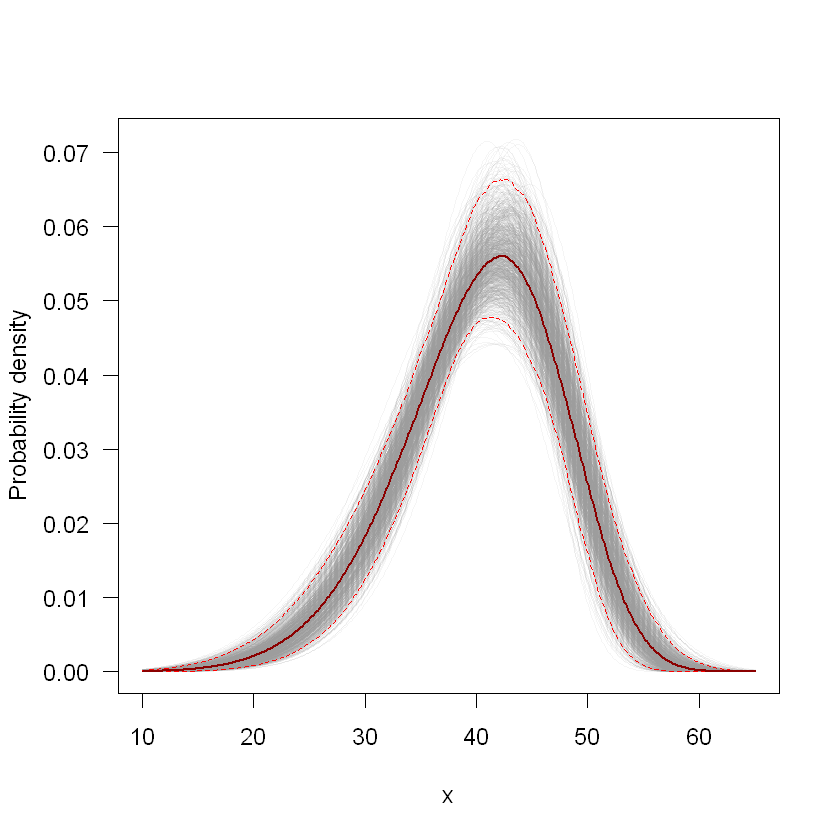

In [45]:
xs <- seq(10, 65, len=500)

true.weibull <- rweibull(1e6, shape= fit.weibull$estimate["shape"]
                         , scale = fit.weibull$estimate["scale"])

boot.pdf <- sapply(1:1000, function(i) {
  xi <- sample(x, size=length(x), replace=TRUE)
  MLE.est <- suppressWarnings(fitdist(xi, distr="weibull"))  
  dweibull(xs, shape=MLE.est$estimate["shape"],  scale = MLE.est$estimate["scale"])
}
)

boot.cdf <- sapply(1:1000, function(i) {
  xi <- sample(x, size=length(x), replace=TRUE)
  MLE.est <- suppressWarnings(fitdist(xi, distr="weibull"))  
  pweibull(xs, shape= MLE.est$estimate["shape"],  scale = MLE.est$estimate["scale"])
}
)   

#-----------------------------------------------------------------------------
# Plot PDF
#-----------------------------------------------------------------------------

par(bg="white", las=1, cex=1.2)
plot(xs, boot.pdf[, 1], type="l", col=rgb(.6, .6, .6, .1), ylim=range(boot.pdf),
     xlab="x", ylab="Probability density")
for(i in 2:ncol(boot.pdf)) lines(xs, boot.pdf[, i], col=rgb(.6, .6, .6, .1))

# Add pointwise confidence bands

quants <- apply(boot.pdf, 1, quantile, c(0.025, 0.5, 0.975))
min.point <- apply(boot.pdf, 1, min, na.rm=TRUE)
max.point <- apply(boot.pdf, 1, max, na.rm=TRUE)
lines(xs, quants[1, ], col="red", lwd=1.5, lty=2)
lines(xs, quants[3, ], col="red", lwd=1.5, lty=2)
lines(xs, quants[2, ], col="darkred", lwd=2)

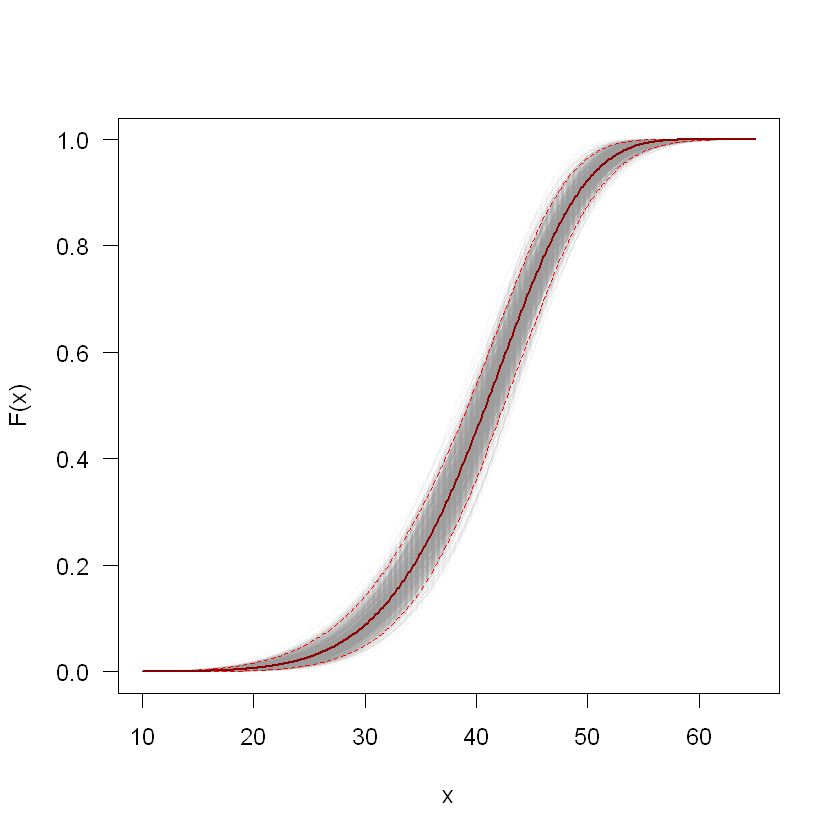

In [46]:
#-----------------------------------------------------------------------------
# Plot CDF
#-----------------------------------------------------------------------------

par(bg="white", las=1, cex=1.2)
plot(xs, boot.cdf[, 1], type="l", col=rgb(.6, .6, .6, .1), ylim=range(boot.cdf),
     xlab="x", ylab="F(x)")
for(i in 2:ncol(boot.cdf)) lines(xs, boot.cdf[, i], col=rgb(.6, .6, .6, .1))

# Add pointwise confidence bands

quants <- apply(boot.cdf, 1, quantile, c(0.025, 0.5, 0.975))
min.point <- apply(boot.cdf, 1, min, na.rm=TRUE)
max.point <- apply(boot.cdf, 1, max, na.rm=TRUE)
lines(xs, quants[1, ], col="red", lwd=1.5, lty=2)
lines(xs, quants[3, ], col="red", lwd=1.5, lty=2)
lines(xs, quants[2, ], col="darkred", lwd=2)
#lines(xs, min.point, col="purple")
#lines(xs, max.point, col="purple")

In [47]:
x

[1] 37.50 46.79 48.30 46.04 43.40 39.25 38.49 49.51 40.38 36.98 40.00 38.49
[13] 37.74 47.92 44.53 44.91 44.91 40.00 41.51 47.92 36.98 43.40 42.26 41.89
[25] 38.87 43.02 39.25 40.38 42.64 36.98 44.15 44.91 43.40 49.81 38.87 40.00
[37] 52.45 53.13 47.92 52.45 44.91 29.54 27.13 35.60 45.34 43.37 54.15 42.77
[49] 42.88 44.26 27.14 39.31 24.80 16.62 30.30 36.39 28.60 28.53 35.84 31.10
[61] 34.55 52.65 48.81 43.42 52.49 38.00 38.65 34.54 37.70 38.11 43.05 29.95
[73] 32.48 24.63 35.33 41.34

In [48]:
fitdistr(x, "weibull")

     shape        scale   
   6.4632971   43.2474500 
 ( 0.5800149) ( 0.8073102)

In [49]:
ks.test(x, "pweibull", scale=43.24745, shape=6.4632971)

Warning message in ks.test(x, "pweibull", scale = 43.24745, shape = 6.4632971):
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  x
D = 0.068597, p-value = 0.8669
alternative hypothesis: two-sided


In [50]:
ks.test(x, "pnorm", mean=mean(x), sd=sd(x))

Warning message in ks.test(x, "pnorm", mean = mean(x), sd = sd(x)):
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  x
D = 0.0912, p-value = 0.5522
alternative hypothesis: two-sided


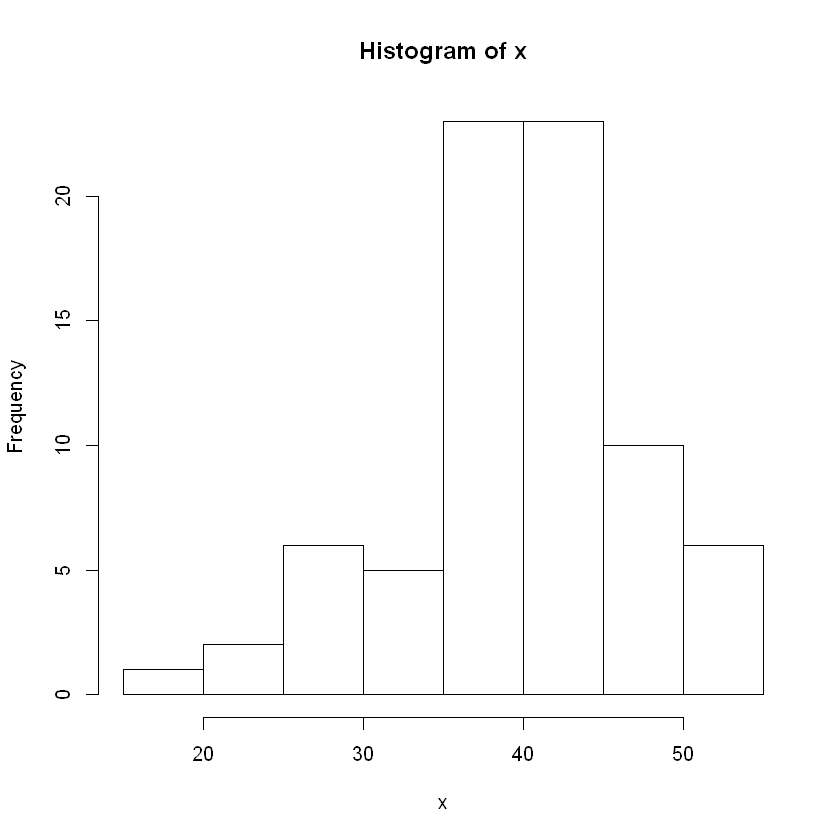

In [52]:
hist(x)

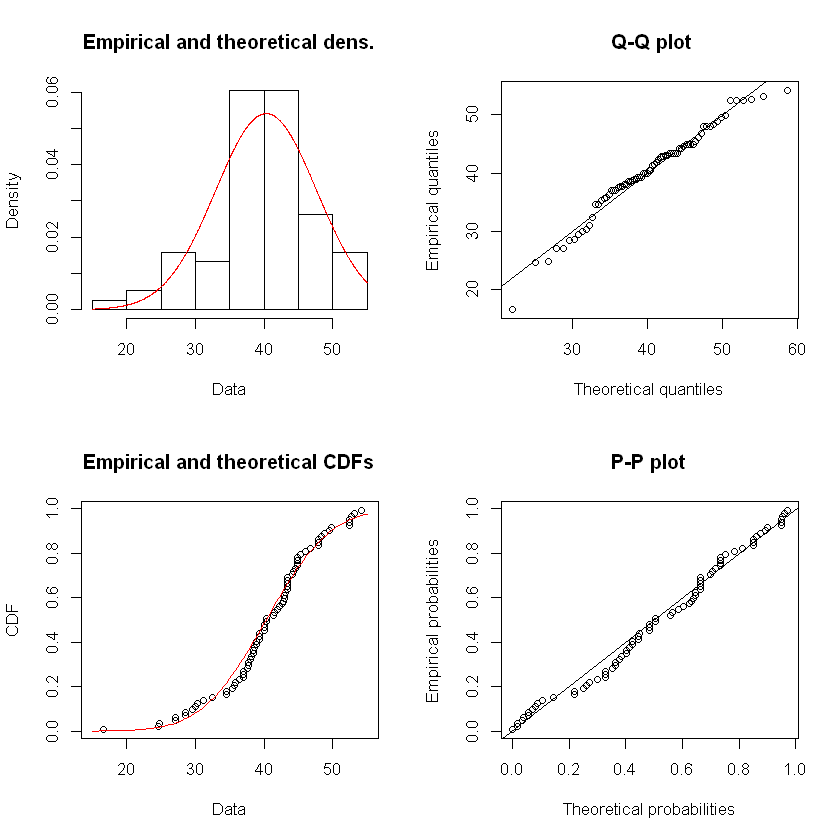

In [53]:
fit.norm <- fitdist(x, "norm")
plot(fit.norm)